## Data Cleaning

- Missing Value
- String Handling
- Merging Dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 999

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1.1 Cleaning the Calls data set

__Size__

Check the data size before loading. It's safe to load a dataset 1/4 of the size of RAM.

In [2]:
!ls -lh

total 57M
-rw-r--r-- 1 nleea 197609  44M Nov 30 02:33 babynames.csv
-rw-r--r-- 1 nleea 197609 6.9M Nov 29 16:42 babynames.zip
-rw-r--r-- 1 nleea 197609 919K Nov 30 20:29 Berkeley_PD_-_Calls_for_Service.csv
-rw-r--r-- 1 nleea 197609 5.2M Nov 30 20:29 Berkeley_PD_-_Stop_Data.csv
-rw-r--r-- 1 nleea 197609 224K Nov 30 15:41 DataDesign&PandasBasic.ipynb
-rw-r--r-- 1 nleea 197609 179K Nov 29 23:26 DataScience_LifeCycleOverview.ipynb
-rw-r--r-- 1 nleea 197609 1.3K Nov 30 20:29 EDA&DataCleaning.ipynb


In [5]:
calls = pd.read_csv('Berkeley_PD_-_Calls_for_Service.csv')
calls

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,19091369,BURGLARY AUTO,07/04/2019 12:00:00 AM,04:00,BURGLARY - VEHICLE,4,11/30/2019 07:00:07 AM,"500 TAMALPAIS RD\nBerkeley, CA",500 TAMALPAIS RD,Berkeley,CA
1,19092434,BURGLARY AUTO,11/05/2019 12:00:00 AM,20:01,BURGLARY - VEHICLE,2,11/30/2019 07:00:10 AM,"PARKER ST\nBerkeley, CA",PARKER ST,Berkeley,CA
2,19067041,BURGLARY AUTO,11/24/2019 12:00:00 AM,21:00,BURGLARY - VEHICLE,0,11/30/2019 07:00:10 AM,"BLAKE ST\nBerkeley, CA",BLAKE ST,Berkeley,CA
3,19053480,BURGLARY AUTO,09/21/2019 12:00:00 AM,10:40,BURGLARY - VEHICLE,6,11/30/2019 07:00:09 AM,"ELLIS ST\nBerkeley, CA",ELLIS ST,Berkeley,CA
4,19053557,ASSAULT/BATTERY FEL.,09/22/2019 12:00:00 AM,09:15,ASSAULT,0,11/30/2019 07:00:09 AM,"600 SHATTUCK SQ\nBerkeley, CA",600 SHATTUCK SQ,Berkeley,CA
...,...,...,...,...,...,...,...,...,...,...,...
5218,19066725,DISTURBANCE,11/23/2019 12:00:00 AM,15:41,DISORDERLY CONDUCT,6,11/30/2019 07:00:10 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
5219,19091780,BURGLARY AUTO,08/27/2019 12:00:00 AM,22:00,BURGLARY - VEHICLE,2,11/30/2019 07:00:08 AM,"800 CHANNING WY\nBerkeley, CA\n(37.861553, -12...",800 CHANNING WY,Berkeley,CA
5220,19091261,THEFT FELONY (OVER $950),06/24/2019 12:00:00 AM,16:00,LARCENY,1,11/30/2019 07:00:07 AM,"RIDGE RD\nBerkeley, CA",RIDGE RD,Berkeley,CA
5221,19044551,BURGLARY AUTO,08/12/2019 12:00:00 AM,17:55,BURGLARY - VEHICLE,1,11/30/2019 07:00:08 AM,"MCGEE AV & HOPKINS ST\nBerkeley, CA\n(37.88207...",MCGEE AV & HOPKINS ST,Berkeley,CA


__Check for missing values__

In this particular example we don't do anything to the missing values as we can't infer their true value.

In [15]:
calls.isnull().sum(axis=1).to_frame()
calls.isnull().sum(axis=0).to_frame()

,0
0,0
1,0
2,0
3,0
4,0
...,...
5218,1
5219,0
5220,0
5221,0


,0
CASENO,0
OFFENSE,0
EVENTDT,0
EVENTTM,0
CVLEGEND,0
CVDOW,0
InDbDate,0
Block_Location,0
BLKADDR,36
City,0


__Formatting Date & Time__

In [29]:
def combine_date_time(calls):
    date_and_time = pd.to_datetime(calls["EVENTDT"] + " " + calls["EVENTTM"], infer_datetime_format=True)
    return calls.assign(EVENTDTTM = date_and_time)

calls.pipe(combine_date_time)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,EVENTDTTM
0,19091369,BURGLARY AUTO,07/04/2019 12:00:00 AM,04:00,BURGLARY - VEHICLE,4,11/30/2019 07:00:07 AM,"500 TAMALPAIS RD\nBerkeley, CA",500 TAMALPAIS RD,Berkeley,CA,2019-07-04 04:00:00
1,19092434,BURGLARY AUTO,11/05/2019 12:00:00 AM,20:01,BURGLARY - VEHICLE,2,11/30/2019 07:00:10 AM,"PARKER ST\nBerkeley, CA",PARKER ST,Berkeley,CA,2019-11-05 20:01:00
2,19067041,BURGLARY AUTO,11/24/2019 12:00:00 AM,21:00,BURGLARY - VEHICLE,0,11/30/2019 07:00:10 AM,"BLAKE ST\nBerkeley, CA",BLAKE ST,Berkeley,CA,2019-11-24 21:00:00
3,19053480,BURGLARY AUTO,09/21/2019 12:00:00 AM,10:40,BURGLARY - VEHICLE,6,11/30/2019 07:00:09 AM,"ELLIS ST\nBerkeley, CA",ELLIS ST,Berkeley,CA,2019-09-21 10:40:00
4,19053557,ASSAULT/BATTERY FEL.,09/22/2019 12:00:00 AM,09:15,ASSAULT,0,11/30/2019 07:00:09 AM,"600 SHATTUCK SQ\nBerkeley, CA",600 SHATTUCK SQ,Berkeley,CA,2019-09-22 09:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5218,19066725,DISTURBANCE,11/23/2019 12:00:00 AM,15:41,DISORDERLY CONDUCT,6,11/30/2019 07:00:10 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,2019-11-23 15:41:00
5219,19091780,BURGLARY AUTO,08/27/2019 12:00:00 AM,22:00,BURGLARY - VEHICLE,2,11/30/2019 07:00:08 AM,"800 CHANNING WY\nBerkeley, CA\n(37.861553, -12...",800 CHANNING WY,Berkeley,CA,2019-08-27 22:00:00
5220,19091261,THEFT FELONY (OVER $950),06/24/2019 12:00:00 AM,16:00,LARCENY,1,11/30/2019 07:00:07 AM,"RIDGE RD\nBerkeley, CA",RIDGE RD,Berkeley,CA,2019-06-24 16:00:00
5221,19044551,BURGLARY AUTO,08/12/2019 12:00:00 AM,17:55,BURGLARY - VEHICLE,1,11/30/2019 07:00:08 AM,"MCGEE AV & HOPKINS ST\nBerkeley, CA\n(37.88207...",MCGEE AV & HOPKINS ST,Berkeley,CA,2019-08-12 17:55:00


__Which parts are entered by human?__

In [32]:
## Spelling is correct for these. We don't have to do anything.
calls['OFFENSE'].unique()
calls['CVLEGEND'].unique()
## Blcok Address is a little messy. Fortunately we can use the latitude and longtitude instead of the block addresses.
calls['BLKADDR'][[0, 5001]]

array(['BURGLARY AUTO', 'ASSAULT/BATTERY FEL.', 'GUN/WEAPON',
       'DISTURBANCE', 'NARCOTICS', 'VANDALISM', 'VEHICLE STOLEN',
       'THEFT MISD. (UNDER $950)', 'ROBBERY', 'VEHICLE RECOVERED',
       'THEFT FELONY (OVER $950)', 'BURGLARY RESIDENTIAL',
       'IDENTITY THEFT', 'THEFT FROM PERSON', 'BURGLARY COMMERCIAL',
       'DOMESTIC VIOLENCE', 'FRAUD/FORGERY', '2ND RESPONSE',
       'THEFT FROM AUTO', 'ALCOHOL OFFENSE', 'ARSON',
       'ASSAULT/BATTERY MISD.', 'SEXUAL ASSAULT FEL.', 'KIDNAPPING',
       'SEXUAL ASSAULT MISD.', 'MISSING ADULT', 'BRANDISHING',
       'DISTURBANCE - NOISE', 'VICE', 'MISSING JUVENILE',
       'MUNICIPAL CODE', 'VEHICLE CODE - DUI'], dtype=object)

array(['BURGLARY - VEHICLE', 'ASSAULT', 'WEAPONS OFFENSE',
       'DISORDERLY CONDUCT', 'DRUG VIOLATION', 'VANDALISM',
       'MOTOR VEHICLE THEFT', 'LARCENY', 'ROBBERY', 'RECOVERED VEHICLE',
       'BURGLARY - RESIDENTIAL', 'FRAUD', 'BURGLARY - COMMERCIAL',
       'FAMILY OFFENSE', 'NOISE VIOLATION', 'LARCENY - FROM VEHICLE',
       'LIQUOR LAW VIOLATION', 'ARSON', 'SEX CRIME', 'KIDNAPPING',
       'MISSING PERSON', 'ALL OTHER OFFENSES', 'DUI'], dtype=object)

0       500 TAMALPAIS RD
5001     1900 RUSSELL ST
Name: BLKADDR, dtype: object

__Seperating latitude and longtitude__

In [34]:
def split_lat_lon(calls):
    # join adds another set of columns
    return calls.join(
        calls['Block_Location']
        # Mutates into several series, and select the third series. 
        .str.split('\n').str[2]
        # Remove parens from coords
        .str[1:-1]
        # Split latitude and longitude, and rename them
        .str.split(', ', expand=True)
        .rename(columns={0: 'Latitude', 1: 'Longitude'})
    )

calls.pipe(split_lat_lon).head(10)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Latitude,Longitude
0,19091369,BURGLARY AUTO,07/04/2019 12:00:00 AM,04:00,BURGLARY - VEHICLE,4,11/30/2019 07:00:07 AM,"500 TAMALPAIS RD\nBerkeley, CA",500 TAMALPAIS RD,Berkeley,CA,NaN,NaN
1,19092434,BURGLARY AUTO,11/05/2019 12:00:00 AM,20:01,BURGLARY - VEHICLE,2,11/30/2019 07:00:10 AM,"PARKER ST\nBerkeley, CA",PARKER ST,Berkeley,CA,NaN,NaN
2,19067041,BURGLARY AUTO,11/24/2019 12:00:00 AM,21:00,BURGLARY - VEHICLE,0,11/30/2019 07:00:10 AM,"BLAKE ST\nBerkeley, CA",BLAKE ST,Berkeley,CA,NaN,NaN
3,19053480,BURGLARY AUTO,09/21/2019 12:00:00 AM,10:40,BURGLARY - VEHICLE,6,11/30/2019 07:00:09 AM,"ELLIS ST\nBerkeley, CA",ELLIS ST,Berkeley,CA,NaN,NaN
4,19053557,ASSAULT/BATTERY FEL.,09/22/2019 12:00:00 AM,09:15,ASSAULT,0,11/30/2019 07:00:09 AM,"600 SHATTUCK SQ\nBerkeley, CA",600 SHATTUCK SQ,Berkeley,CA,NaN,NaN
5,19030928,GUN/WEAPON,06/07/2019 12:00:00 AM,12:00,WEAPONS OFFENSE,5,11/30/2019 07:00:06 AM,"1600 165TH AV\nBerkeley, CA",1600 165TH AV,Berkeley,CA,NaN,NaN
6,19048515,DISTURBANCE,08/29/2019 12:00:00 AM,23:29,DISORDERLY CONDUCT,4,11/30/2019 07:00:08 AM,"UNIVERSITY AVE\nBerkeley, CA",UNIVERSITY AVE,Berkeley,CA,NaN,NaN
7,19066921,DISTURBANCE,11/24/2019 12:00:00 AM,13:35,DISORDERLY CONDUCT,0,11/30/2019 07:00:10 AM,"SHATTUCK AVENUE &ADDISON ST\nBerkeley, CA",SHATTUCK AVENUE &ADDISON ST,Berkeley,CA,NaN,NaN
8,19060101,NARCOTICS,10/23/2019 12:00:00 AM,02:11,DRUG VIOLATION,3,11/30/2019 07:00:09 AM,"800 BOLIVAR DR\nBerkeley, CA",800 BOLIVAR DR,Berkeley,CA,NaN,NaN
9,19092632,VANDALISM,11/25/2019 12:00:00 AM,18:40,VANDALISM,1,11/30/2019 07:00:10 AM,"100 SEWALL\nBerkeley, CA",100 SEWALL,Berkeley,CA,NaN,NaN


__Matching weekdays through CVDOW__

In [ ]:
# day_of_week = pd.read_csv('data/cvdow.csv')
# day_of_week
# def match_weekday(calls):
      ## merge adds a smaller dataset to the larger one. It assigns new features to each entry according to the indicated index
      ## shared by both dataset.
#     return calls.merge(day_of_week, on='CVDOW')
# calls.pipe(match_weekday).head(2)

# def drop_unneeded_cols(calls):
#     return calls.drop(columns=['CVDOW', 'InDbDate', 'Block_Location', 'City',
#                                'State', 'EVENTDT', 'EVENTTM'])

# calls_final = (calls.pipe(combine_event_datetimes)
#                .pipe(split_lat_lon)
#                .pipe(match_weekday)
#                .pipe(drop_unneeded_cols))
# df_interact(calls_final)

### 1.2 Joins

Data will often be split across multiple tables. For example, one table can describe some people's personal information while another will contain their emails:

In [35]:
people = pd.DataFrame(
    [["Joey",      "blue",    42,  "M"],
     ["Weiwei",    "blue",    50,  "F"],
     ["Joey",      "green",    8,  "M"],
     ["Karina",    "green",    7,  "F"],
     ["Nhi",       "blue",     3,  "F"],
     ["Sam",       "pink",   -42,  "M"]], 
    columns = ["Name", "Color", "Number", "Sex"])

people

email = pd.DataFrame(
    [["Deb",  "deborah_nolan@berkeley.edu"],
     ["Sam",  "samlau95@berkeley.edu"],
     ["John", "doe@nope.com"],
     ["Joey", "jegonzal@cs.berkeley.edu"],
     ["Weiwei", "weiwzhang@berkeley.edu"],
     ["Weiwei", "weiwzhang+123@berkeley.edu"],
     ["Karina", "kgoot@berkeley.edu"]], 
    columns = ["User Name", "Email"])

email

,Name,Color,Number,Sex
0,Joey,blue,42,M
1,Weiwei,blue,50,F
2,Joey,green,8,M
3,Karina,green,7,F
4,Nhi,blue,3,F
5,Sam,pink,-42,M


,User Name,Email
0,Deb,deborah_nolan@berkeley.edu
1,Sam,samlau95@berkeley.edu
2,John,doe@nope.com
3,Joey,jegonzal@cs.berkeley.edu
4,Weiwei,weiwzhang@berkeley.edu
5,Weiwei,weiwzhang+123@berkeley.edu
6,Karina,kgoot@berkeley.edu


We have to decide how to deal with entries with keys that appear in the first dataset but not the second. Below are four forms of joins:

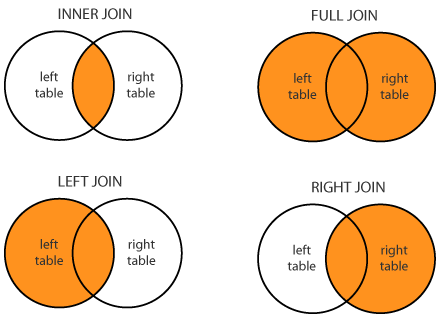

In [36]:
people.merge(email, how='inner', left_on='Name', right_on='User Name')

,Name,Color,Number,Sex,User Name,Email
0,Joey,blue,42,M,Joey,jegonzal@cs.berkeley.edu
1,Joey,green,8,M,Joey,jegonzal@cs.berkeley.edu
2,Weiwei,blue,50,F,Weiwei,weiwzhang@berkeley.edu
3,Weiwei,blue,50,F,Weiwei,weiwzhang+123@berkeley.edu
4,Karina,green,7,F,Karina,kgoot@berkeley.edu
5,Sam,pink,-42,M,Sam,samlau95@berkeley.edu


In [37]:
people.merge(email, how='outer', left_on='Name', right_on='User Name')

,Name,Color,Number,Sex,User Name,Email
0,Joey,blue,42.0,M,Joey,jegonzal@cs.berkeley.edu
1,Joey,green,8.0,M,Joey,jegonzal@cs.berkeley.edu
2,Weiwei,blue,50.0,F,Weiwei,weiwzhang@berkeley.edu
3,Weiwei,blue,50.0,F,Weiwei,weiwzhang+123@berkeley.edu
4,Karina,green,7.0,F,Karina,kgoot@berkeley.edu
5,Nhi,blue,3.0,F,NaN,NaN
6,Sam,pink,-42.0,M,Sam,samlau95@berkeley.edu
7,NaN,NaN,NaN,NaN,Deb,deborah_nolan@berkeley.edu
8,NaN,NaN,NaN,NaN,John,doe@nope.com


In [39]:
# Note that entries would be propertly duplicated.
people.merge(email, how='left', left_on='Name', right_on='User Name')

,Name,Color,Number,Sex,User Name,Email
0,Joey,blue,42,M,Joey,jegonzal@cs.berkeley.edu
1,Weiwei,blue,50,F,Weiwei,weiwzhang@berkeley.edu
2,Weiwei,blue,50,F,Weiwei,weiwzhang+123@berkeley.edu
3,Joey,green,8,M,Joey,jegonzal@cs.berkeley.edu
4,Karina,green,7,F,Karina,kgoot@berkeley.edu
5,Nhi,blue,3,F,NaN,NaN
6,Sam,pink,-42,M,Sam,samlau95@berkeley.edu
